

# Hierarchical Clustering and Cluster Evaluation


Let us consider presidential elections of years past and do some exploratory grouping of states based on the 2008,2012, and 2016 presidential elections results.  The data we have is from the [The American Presidency Project](https://www.presidency.ucsb.edu/statistics/elections) and split into two files:

  - `votes_by_state.csv` => has the raw number of ballots cast for each of the top presidential candidates from 2008-2012 by US State (and the District of Columbia)
  - `republican_percentage_by_state.csv` => has the percentage of votes that were for the Republican candidate for 2008, 2012, and 2016 by US State (and the District of Columbia)
  
Our job is to group together states using different hierarchical agglomerative methodologies and compare the results.  One can imagine how finding states that tend to vote similarly to each other might be useful for election predictions, or for identifying swing states as part of a political campaign to invest in.

In [27]:

# Our regular libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
%matplotlib inline

# This is for our hierarchical clustering
from scipy.cluster.hierarchy import dendrogram, linkage, cophenet
from scipy.spatial.distance import pdist
from scipy.spatial.distance import squareform

# For our k-means clustering
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples

## Using Different Proximity Functions

Using Scipy libraries to plot the hierarchical clusters formed from the raw vote count (`votes_by_state.csv`) using three different proximity measures:
  - Ward
  - Min
  - Max
 

In [51]:
df_X = pd.read_csv('votes_by_state.csv')
s_states = df_X['State']
df_X = df_X.drop(columns=['State'])
df_X_1 = df_X.set_index(s_states)
df_X_1


,Clinton,Trump,Johnson,Obama 2012,Romney,Obama 2008,McCain
State,,,,,,,
Alabama,729547,1318255,44467,795696,1255925,813479,1266546
Alaska,116454,163387,18725,122640,164676,123594,193841
Arizona,1161167,1252401,106327,1025232,1233654,1034707,1230111
Arkansas,380494,684872,29829,394409,647744,422310,638017
California,8753788,4483810,478500,7854285,4839958,8274473,5011781
Colorado,1338870,1202484,144121,1323101,1185243,1288576,1073589
Connecticut,897572,673215,48676,905083,634892,997772,629428
Delaware,235603,185127,14757,242584,165484,255459,152374
Dist. of Col.,282830,12723,4906,267070,21381,245800,17367


Text(0.5, 0, 'State')

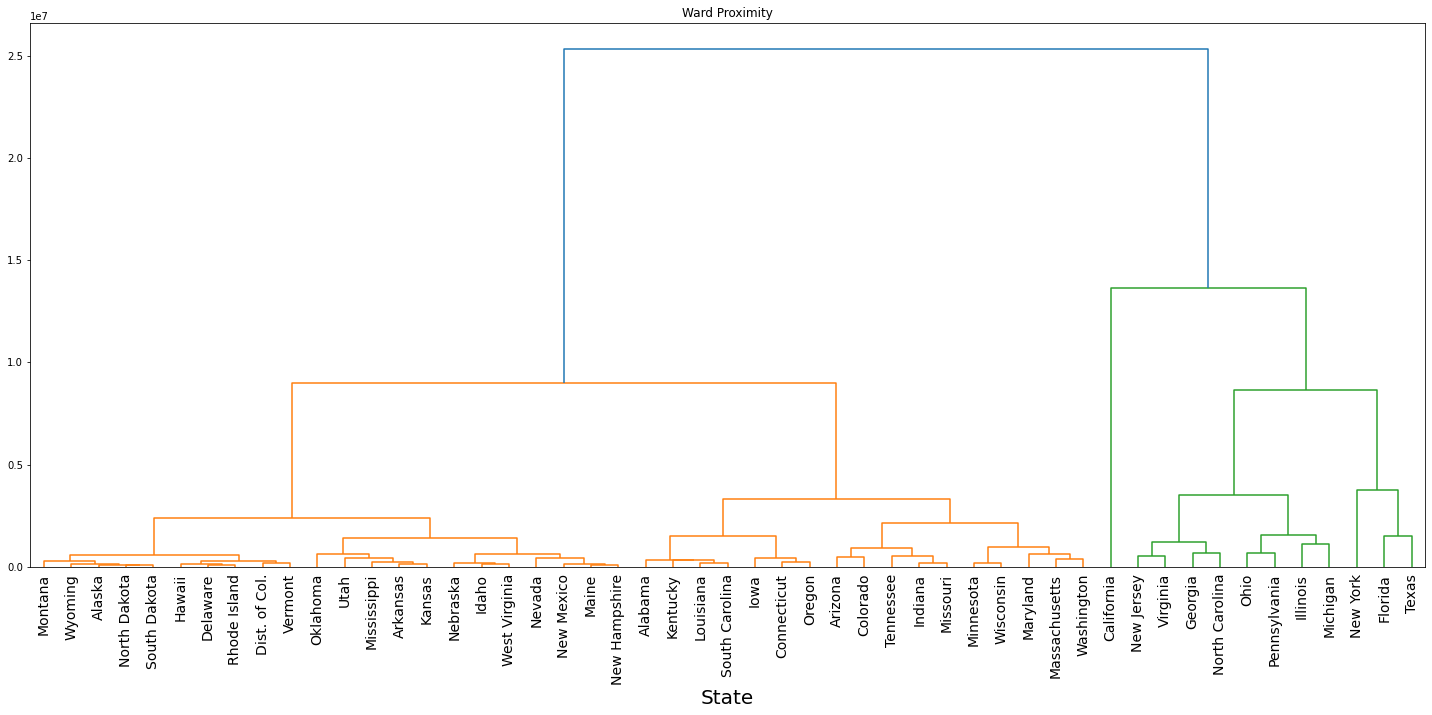

In [34]:
# Plot the dendrogram for the Ward proximity measure
Z = linkage(df_X.values, 'ward')
fig = plt.figure(figsize=(25, 10))
plt.title("Ward Proximity")
dn = dendrogram(Z,labels = s_states.tolist(), leaf_font_size = 14)



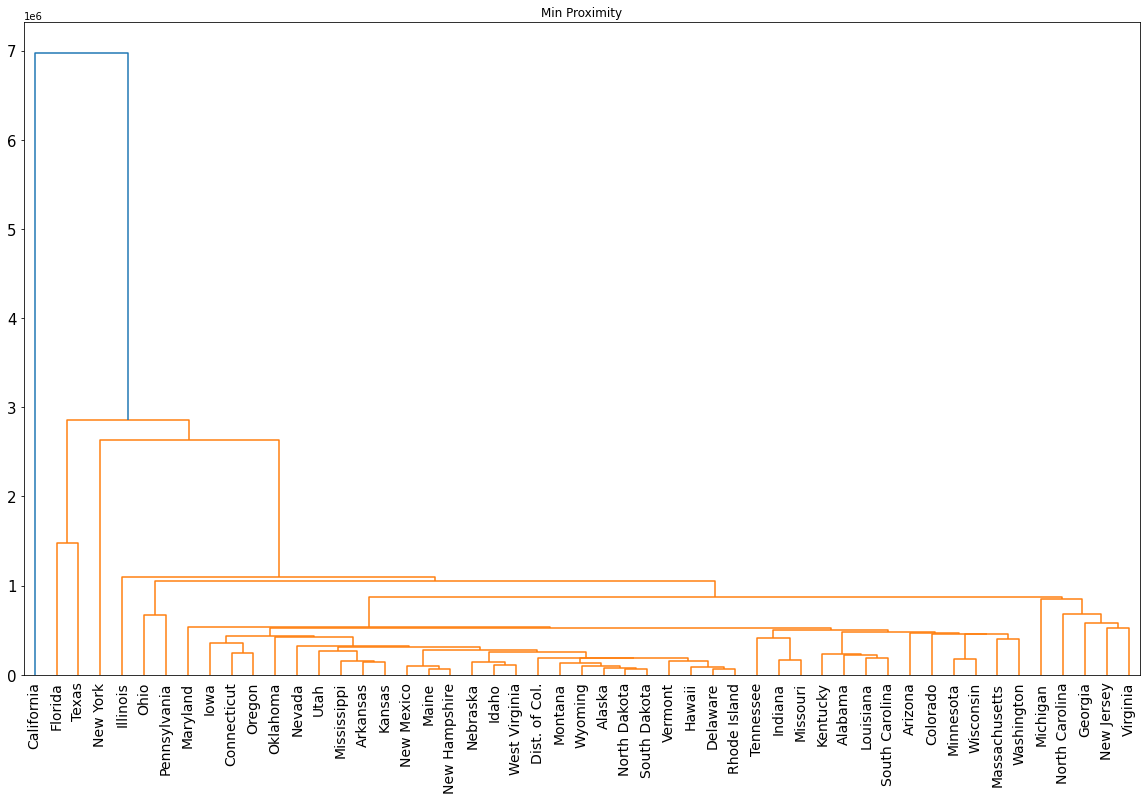

In [36]:
Z = linkage(df_X.values, 'single')

fig = plt.figure(figsize=(20, 12))
plt.title("Min Proximity")
plt.yticks(fontsize= 15 )
dn = dendrogram(Z,labels = s_states.tolist(), leaf_font_size = 14)

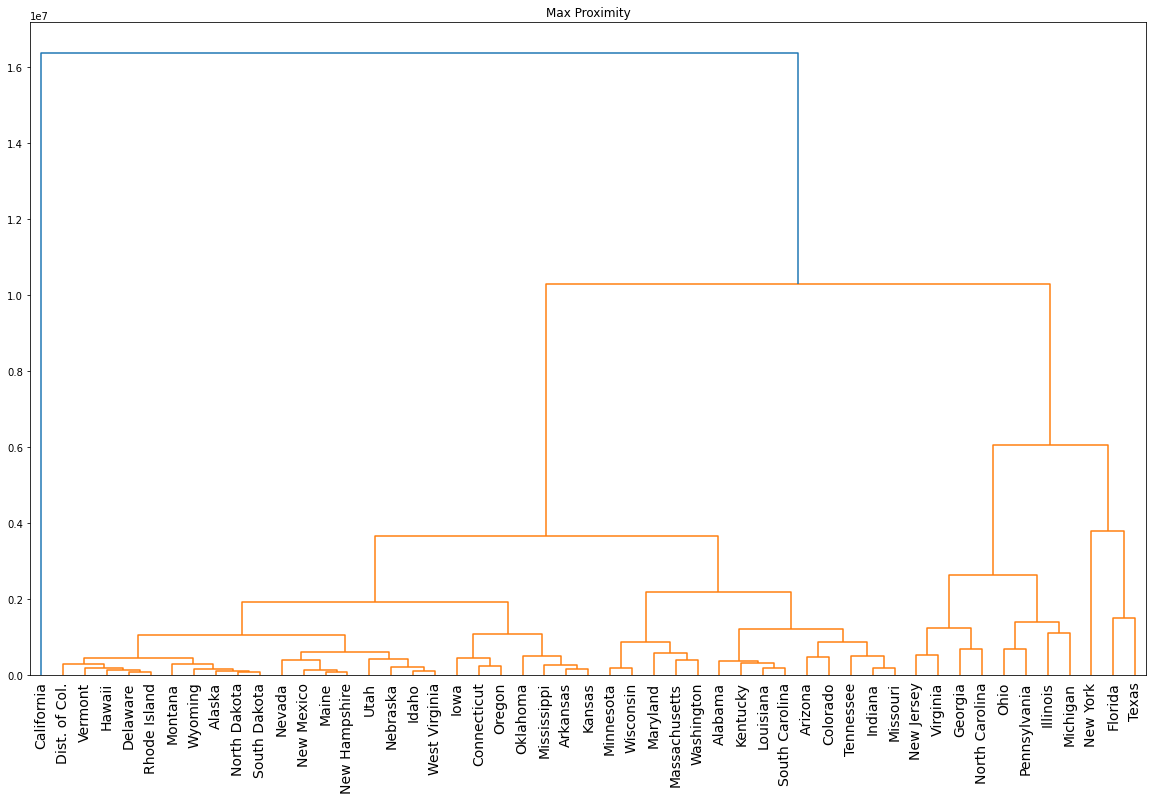

In [37]:
# Plot the dendrogram for the max proximity measure
Z = linkage(df_X.values, 'complete')

fig = plt.figure(figsize=(20, 12))
plt.title("Max Proximity")
dn = dendrogram(Z,labels = s_states.tolist(), leaf_font_size = 14)
plt.savefig("a.jpeg", dpi = 100)

## Using Different Proximity Functions (part 2)

In the above proximity function, we see that New York is closer to Texas than California, and Montana, Wyoming, and Alaska all tend to cluster together.

This is because because in our current functions, the population of the state is more important than the party which one, so we reduce the dimensions down to 3 attributes from 7, where each column is the percentage of votes that were cast to the Republican candidate, and a 4th attribute indicating the range of percentages across the 3 elections.

Plotting the hierarchical clusters formed from percentage of ballots cast by Republicans (`republican_percentage_by_state.csv`) using three different proximity measures:
  - Ward
  - Min
  - Max
  

In [43]:
# Load the data, save off the state names into another series and just leave the attributes.
df_X = pd.read_csv('republican_percentage_by_state.csv')
s_states = df_X['State']
df_X = df_X.drop(columns=['State'])

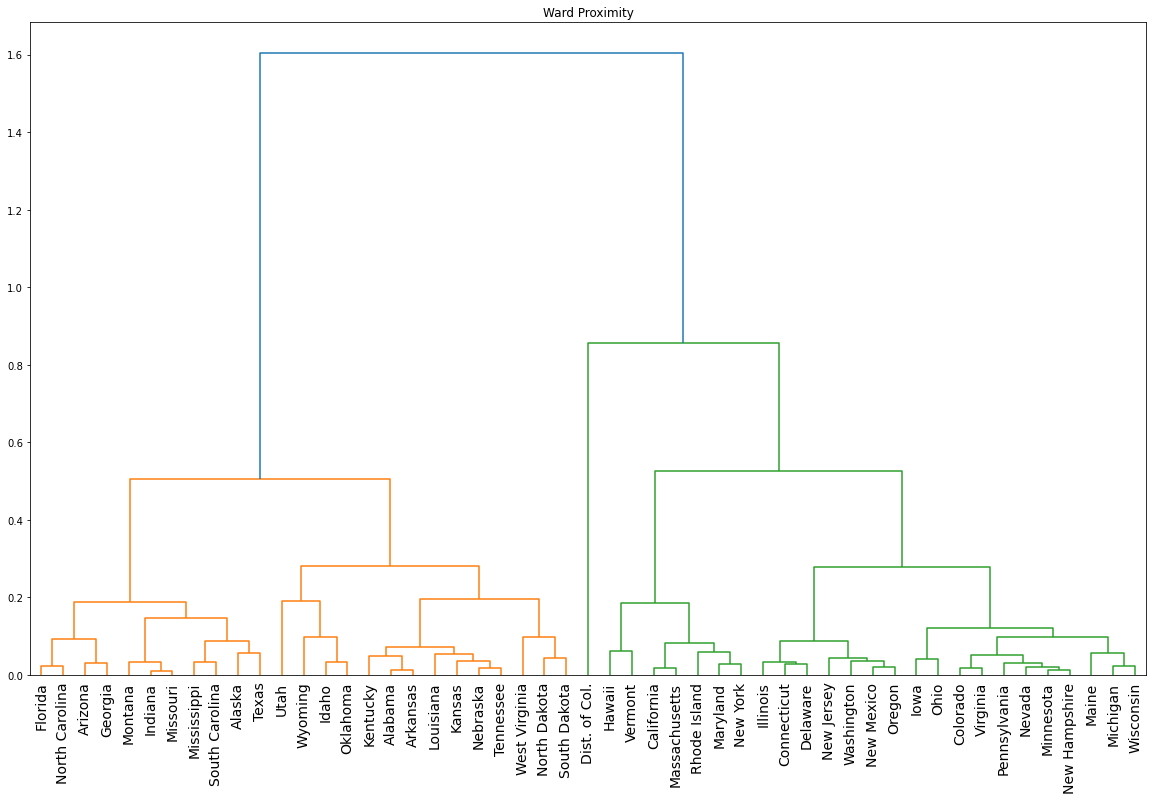

In [44]:
# Plot the dendrogram for the Ward proximity measure
Z_ward = linkage(df_X.values, 'ward')
fig = plt.figure(figsize=(20, 12))
plt.title("Ward Proximity")
dn = dendrogram(Z_ward,labels = s_states.tolist(), leaf_font_size = 14)


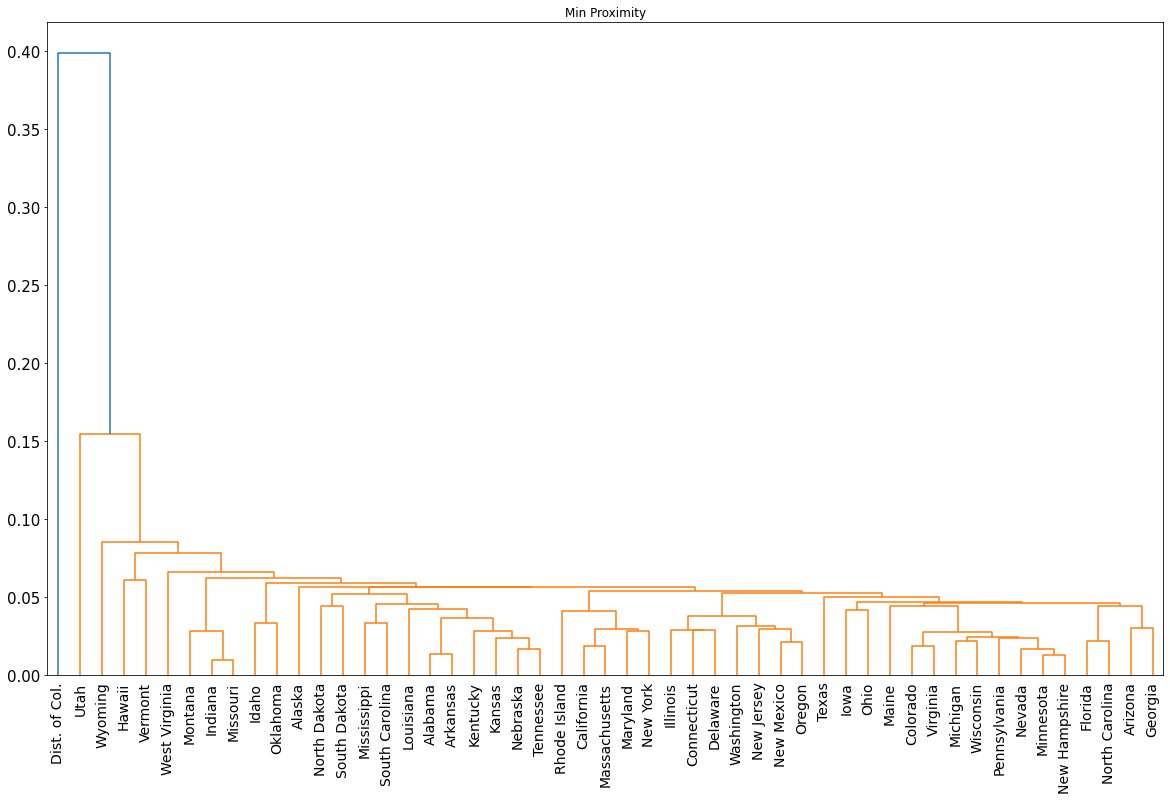

In [45]:
Z_min = linkage(df_X.values, 'single')

fig = plt.figure(figsize=(20, 12))
plt.title("Min Proximity")
plt.yticks(fontsize= 15 )
dn = dendrogram(Z_min,labels = s_states.tolist(), leaf_font_size = 14)
# Plot the dendrogram for the min proximity measure

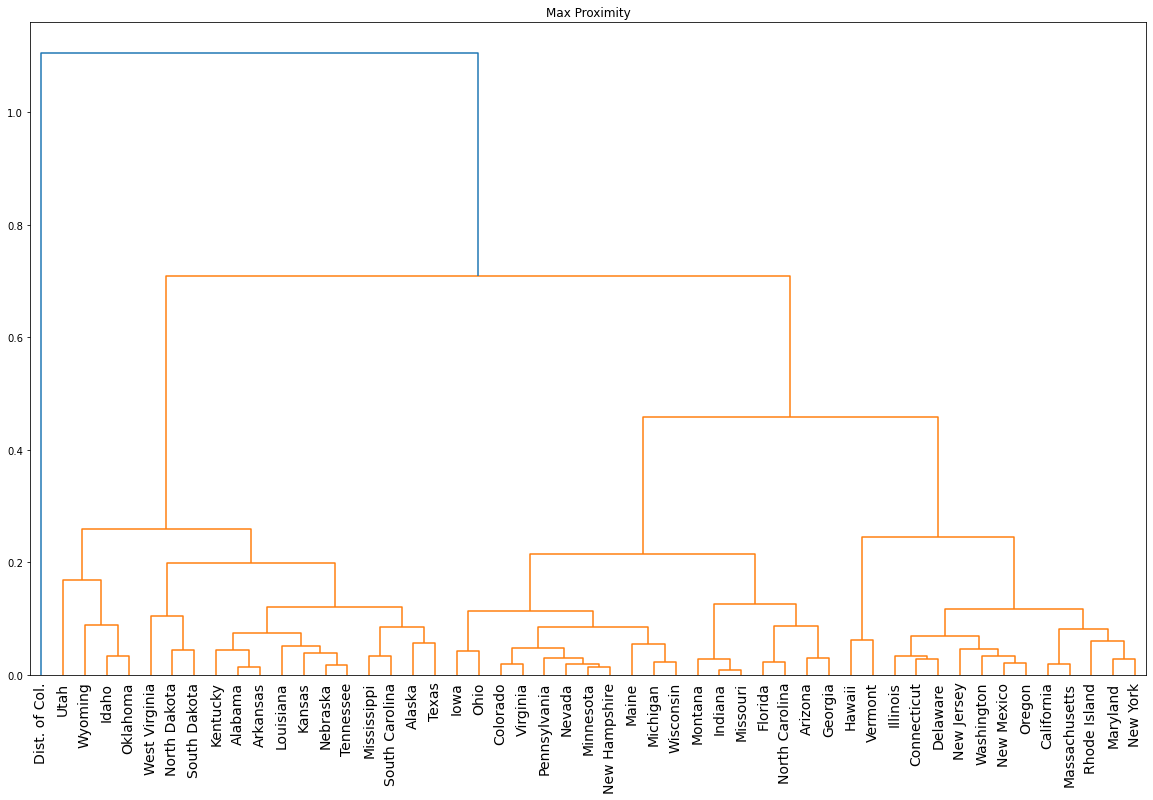

In [46]:
# Plot the dendrogram for the max proximity measure
# Plot the dendrogram for the max proximity measure
Z_max = linkage(df_X.values, 'complete')

fig = plt.figure(figsize=(20, 12))
plt.title("Max Proximity")
dn = dendrogram(Z_max,labels = s_states.tolist(), leaf_font_size = 14)

## Calculate the Cophenetic Correlation Coefficient (CPCC)

Using the data from question 2 (creating hierarchical clusters on the percentage of Republican votes), we calculate the Cophenetic Correlation Coefficient for each of the three methods.  

In [47]:
Y = pdist(df_X.values)
cpcc_ward = cophenet(Z_ward, Y = Y)[0]
cpcc_min = cophenet(Z_min, Y = Y)[0]
cpcc_max = cophenet(Z_max, Y = Y)[0]


In [48]:
# Show the results
(cpcc_ward,cpcc_min,cpcc_max)

(0.5883071696030502, 0.695463585768092, 0.7406937703705782)

We get the greatest cpcc for z_max, followed by z_min and z_ward

## Find new Clusters Based on K-Means

We can use K-means clustering to come up with a specific number of clusters as opposed to natural clusters from the ward proximity function. We can choose 4 points to initialize our cluster centers based on the Ward proximity graph in our hierarchical clusters. This technique can be used, for example, by a political campaign to come up with 4 different strategies based on the clustering.

  - Montana
  - Arkansas
  - Massachusetts
  - Minnesota



In [49]:
# Find the centroids
#centroids = s_state
states_lst = s_states.tolist()
centroids = pd.DataFrame(columns = df_X.columns)
centroids = centroids.append(df_X.iloc[states_lst.index("Montana")], ignore_index = True)
centroids = centroids.append(df_X.iloc[states_lst.index("Arkansas")], ignore_index = True)
centroids = centroids.append(df_X.iloc[states_lst.index("Massachusetts")], ignore_index = True)
centroids = centroids.append(df_X.iloc[states_lst.index("Minnesota")], ignore_index = True)

In [50]:
# Show the centroids
centroids

,2016,2012,2008,range
0,0.575769,0.570342,0.511694,0.064075
1,0.625343,0.621544,0.601717,0.023625
2,0.338355,0.382143,0.368029,0.043788
3,0.471869,0.460588,0.447706,0.024163


In [16]:
# Compute the k-means clusters and show the listing of the States in each cluster
s_centroid_assignment = KMeans(n_clusters = 4, init = np.array(centroids)).fit(df_X)

dict0 = dict()
l1 = []
l2 = []
l3 = []
l4 = []

for i in range(len(k_means.labels_)):
    if k_means.labels_[i] == 0:
        l1.append(s_states.loc[i])
    if k_means.labels_[i] == 1:
        l2.append(s_states.loc[i])
    if k_means.labels_[i] == 2:
        l3.append(s_states.loc[i])
    if k_means.labels_[i] == 3:
        l4.append(s_states.loc[i])
        
dict0["Cluster 1"] = l1
dict0["Cluster 2"] = l2
dict0["Cluster 3"] = l3
dict0["Cluster 4"] = l4

print("States in cluster 1: ", end = "")
for i in l1:
    print(i, end = ", ")
print("\n\nStates in cluster 2:", end = " ")
for i in l2:
    print(i, end = ", ")
print("\n\nStates in cluster 3:", end = " ")

for i in l3:
    print(i, end = ", ")
print("\n\nStates in cluster 4:", end = " ")

for i in l4:
    print(i, end = ", ")
    

States in cluster 1: Alaska, Arizona, Georgia, Indiana, Kansas, Louisiana, Mississippi, Missouri, Montana, North Carolina, South Carolina, South Dakota, Texas, 

States in cluster 2: Alabama, Arkansas, Idaho, Kentucky, Nebraska, North Dakota, Oklahoma, Tennessee, Utah, West Virginia, Wyoming, 

States in cluster 3: California, Dist. of Col., Hawaii, Maryland, Massachusetts, New York, Rhode Island, Vermont, 

States in cluster 4: Colorado, Connecticut, Delaware, Florida, Illinois, Iowa, Maine, Michigan, Minnesota, Nevada, New Hampshire, New Jersey, New Mexico, Ohio, Oregon, Pennsylvania, Virginia, Washington, Wisconsin, 

/Users/Aditya/opt/anaconda3/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:984: RuntimeWarning: Explicit initial center position passed: performing only one init in KMeans instead of n_init=10.
  self._check_params(X)


## Visualizing the Silhouette Coefficients for Each Cluster

Using the [Silhouette Coefficient](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_samples.html) implementation in sci-kit learn,we calculate the silhouette coefficient for each of the States in our data frame using the clustering from Q4, and create a bar graph

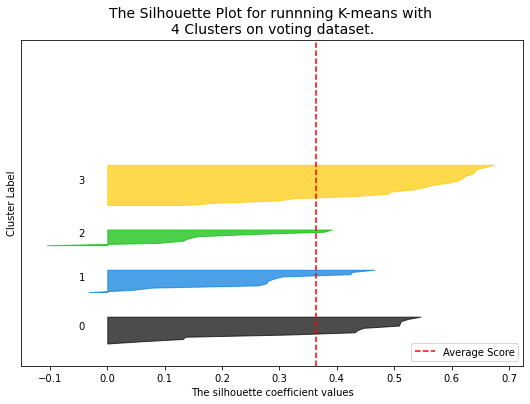

In [23]:
fig, ax1 = plt.subplots(1, 1)
fig.set_size_inches(9,6)
ax1.set_xlim([-0.15,0.725])

n_clusters = 4
ax1.set_ylim([0,len(df_X ) + (n_clusters + 1)* 19])
cluster_labels = s_centroid_assignment.labels_

sample_silhouette_values = silhouette_samples(df_X, cluster_labels)

silhouette_avg = sum(sample_silhouette_values) / len(sample_silhouette_values)

y_lower = 10
silhouette_values = []
for i in range(n_clusters):
    ith_cluster_silhouette_values = \
        sample_silhouette_values[cluster_labels == i]
    
    ith_cluster_silhouette_values.sort()
    
    silhouette_values.append(ith_cluster_silhouette_values)
    
    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i
    
    color = cm.nipy_spectral(float(i) / n_clusters)
    ax1.fill_betweenx(np.arange(y_lower, y_upper),
                      0, ith_cluster_silhouette_values, 
                      facecolor = color, edgecolor = color, alpha = 0.7)
    ax1.text(-0.05,y_lower + 0.5 * size_cluster_i, str(i))
    y_lower = y_upper + 10
ax1.set_title("The Silhouette Plot for runnning K-means with \n4 Clusters on voting dataset.", fontsize = 14)
ax1.set_xlabel("The silhouette coefficient values")
ax1.set_ylabel("Cluster Label")

ax1.axvline(x = silhouette_avg, color = "red", linestyle = '--')

ax1.set_yticks([])
ax1.set_xticks([x/10 for x in range(-1,8)])
ax1.legend(["Average Score"], loc = 4)
plt.show()
    

The silloette plot describes the silhouette values for 4 clusters, each represented in a different color. The higher the silhouette value the closer the point "fits in" within its own cluster. More generally, high silhouette values indicate clusters which are dense and well separated.
Thus from the plot, I can easily identify the clusters 1 and 2 both contain outlier points. This is because both clusters have points with silhouette values less than zero,
which indicates that both clusters contain points which don't fit in well within their cluster.
Using the code below, I was able to identify these outlier points In clusters 0 and 1 as Rhode Island and Nebraska.

In [26]:
print("Outlier Points")
for idx, state in s_states[sample_silhouette_values <= 0].iteritems():
    print(state,'--- Cluster', s_centroid_assignment.labels_[idx])

Outlier Points
Nebraska --- Cluster 1
Rhode Island --- Cluster 2
